### image clustering

use venv N2D

https://arxiv.org/pdf/1908.05968.pdf

https://n2d.readthedocs.io/en/latest/quickstart.html#building-the-model

see also:

https://github.com/sudiptodip15/ClusterGAN

https://github.com/zhampel/clusterGAN

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";  

In [2]:
import os
import urllib3

import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
from keras.datasets import mnist
from pathlib import Path
from PIL import Image
from skimage import color
from skimage import io
import n2d
from IPython.display import Image as ip_image

Using TensorFlow backend.
/home/walle/.virtualenvs/N2D/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:21: DeprecationWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


### caribbean 

load as greyscale

In [3]:
img_size=64

In [4]:
data_dir = Path('../data')
sub_dir = Path('../data/submissions')

In [5]:
train_images=data_dir/f'train/rotated/clipped/reflect/{img_size}'
test_images=data_dir/f'test/rotated/clipped/reflect/{img_size}'

### dataset

In [6]:
df_test=pd.read_csv(sub_dir/f'stage-2-rn50-03_1-cv_reflect_101-20191026-1964891c.csv')

In [7]:
len(df_test)

7325

In [8]:
df_test.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,7a4d630a,0.013808,0.980777,0.000303,0.003716,0.001395
1,7a4bbbd6,0.000810,0.949852,0.000470,0.048376,0.000491
2,7a4ac744,0.001608,0.855418,0.001628,0.140389,0.000957
3,7a4881fa,0.004803,0.234743,0.006764,0.752769,0.000920
4,7a4aa4a8,0.004477,0.706235,0.003069,0.283955,0.002263


In [9]:
df_temp=df_test.drop(columns=['id'])

In [10]:
#get class maximumns
classes=df_temp.idxmax(axis=1)

In [11]:
df_test['roof_material']=classes

In [12]:
df_test.drop(columns=['concrete_cement','healthy_metal','incomplete','irregular_metal','other'],inplace=True)

In [13]:
df_test.head()

,id,roof_material
0,7a4d630a,healthy_metal
1,7a4bbbd6,healthy_metal
2,7a4ac744,healthy_metal
3,7a4881fa,irregular_metal
4,7a4aa4a8,healthy_metal


In [14]:
file_list= df_test['id'].values.tolist()

In [15]:
def get_caribbean_images(file_list):
    images=[]
    names=[]
    for img in test_images.iterdir():
        if str(img).endswith('.tif'):
            name = str(img).split('/')[-1]
            name = name.split('.tif')[0]
            if name in file_list:
                names.append(name)
                im = Image.open(img).convert('L')
                in_data = np.asarray(im, dtype=np.uint8)
                images.append(in_data)
    np_img=np.array(images)
    return np_img, names
    

In [16]:
np_x, names=get_caribbean_images(file_list)

In [17]:
np_x.shape

(7325, 64, 64)

In [18]:
np_x = np_x.reshape((np_x.shape[0], -1))

#### categories

In [19]:
def get_image_cats(names):
    categories=[]
    for im_id in names:
        cat = df_test.loc[df_test['id'] == im_id, 'roof_material']
        categories.append(str(cat).split()[1])
    return categories

In [20]:
categories=get_image_cats(names)

In [21]:
n_cl_caribbean=len(list(set(categories)))

In [22]:
n_cl_caribbean

5

In [23]:
df_test["roof_material"] = df_test["roof_material"].astype('category')

In [24]:
df_test["roof_codes"] = df_test["roof_material"].cat.codes

In [25]:
df_test["roof_codes"]=df_test["roof_codes"]+1

In [26]:
df_test.head(n=50)

,id,roof_material,roof_codes
0,7a4d630a,healthy_metal,2
1,7a4bbbd6,healthy_metal,2
2,7a4ac744,healthy_metal,2
3,7a4881fa,irregular_metal,4
4,7a4aa4a8,healthy_metal,2
5,7a514434,healthy_metal,2
6,7a485f72,healthy_metal,2
7,7a4b8d32,healthy_metal,2
8,7a47eb3c,irregular_metal,4
9,7a4be3ae,irregular_metal,4


In [27]:
y = df_test['roof_codes'].values.tolist()

In [44]:
df_test['roof_codes'].unique()

array([2, 4, 1, 3, 5])

In [45]:
df_test['roof_material'].unique()

[healthy_metal, irregular_metal, concrete_cement, incomplete, other]
Categories (5, object): [healthy_metal, irregular_metal, concrete_cement, incomplete, other]

In [28]:
len(y)

7325

In [29]:
wts_dir = Path('weights')
wts_dir.mkdir(exist_ok=True)

In [30]:
np_x.shape

(7325, 4096)

In [31]:
type(np_x[0])

numpy.ndarray

In [32]:
carribbean_cl = n2d.n2d(np_x, nclust = n_cl_caribbean)

n2d.__init__() shape: [4096, 500, 500, 2000, 5], architecture: [500, 500, 2000]
AutoEncoder.__init__() dims: 5
AutoEncoder.__init__() x: (None, 4096)
AutoEncoder.__init__() n_stacks: 4
AutoEncoder.__init__() i: 0
AutoEncoder.__init__() i: 1
AutoEncoder.__init__() i: 2
AutoEncoder.__init__() pre Dense h: (None, 2000)
AutoEncoder.__init__() post Dense h: (None, 4096)
n2d.__init__() hidden: (None, 5)


### Train

In [33]:
#carribbean_cl.preTrainEncoder(pretrain_epochs = 100, weight_id = 'test_64')

#### load pre-trained

<pre>
preTrainEncoder(self,batch_size = 256, pretrain_epochs = 1000,
                     loss = 'mse', optimizer = 'adam',weights = None,
                     verbose = 0, weight_id = 'generic_autoencoder'):
    </pre>

In [34]:
carribbean_cl.preTrainEncoder(weights=wts_dir/'test_64-100-ae_weights.h5')

### predict clusters

In [35]:
manifold_cluster = n2d.UmapGMM(n_cl_caribbean)
carribbean_cl.predict(manifold_cluster)

/home/walle/.virtualenvs/N2D/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../home/walle/.virtualenvs/N2D/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/walle/.virtualenvs/N2D/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../..

In [36]:
y[0]

2

In [37]:
print(carribbean_cl.assess(y))

best_cluster_fit y_true: (7325,), y_pred: (7325,)
(0.24123, 0.00057, -0.00028)


/home/walle/.virtualenvs/N2D/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
/home/walle/.virtualenvs/N2D/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [39]:
ids=df_test['id'].values.tolist()

In [40]:
len(ids)

7325

saving figure to: viz/caribbean_test-n2d.png


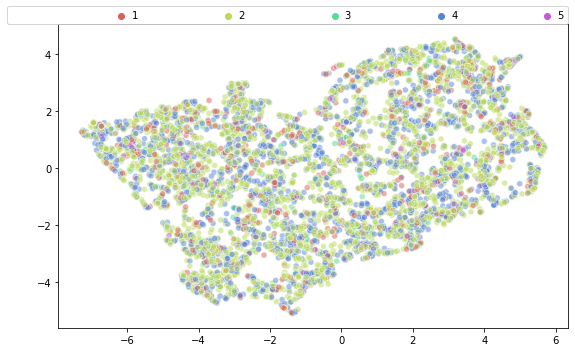

best_cluster_fit y_true: (7325,), y_pred: (7325,)
saving figure to: viz/caribbean_test-n2d-predicted.png


/home/walle/.virtualenvs/N2D/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


<Figure size 432x288 with 0 Axes>

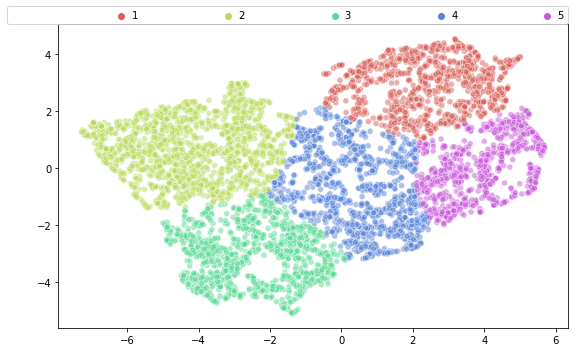

<Figure size 432x288 with 0 Axes>

In [41]:
carribbean_cl.visualize(y, names=None, dataset = "caribbean_test", nclust = n_cl_caribbean, first_n_pts=7325,ids=ids)


In [ ]:

ip_image(filename='viz/caribbean_test-n2d.png') 

In [ ]:
ip_image(filename='viz/caribbean_invalid-n2d.png') 

### valid

In [ ]:
ip_image(filename='viz/caribbean-n2d.png') 